<a href="https://colab.research.google.com/github/kidd000/Acerbi_Textbook/blob/main/acerbi_CH5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

前の2章では、形質の特性に起因するバイアス（直接バイアス）と、集団の特性に起因するバイアス（間接バイアス）の2つの形態のバイアスのある伝達を検討しました。前章では、形質の頻度（同調主義傾向）を考慮した頻度依存型の間接バイアスを検討しました。ここでは、デモンストレータの特定の特徴を考慮した間接バイアスを検討します。このデモンストレータに基づくバイアスは、文化進化の文献では「モデルバイアス」や「文脈バイアス」とも呼ばれています。

先に作成したシミュレーションはかなり標準的なものですが、間接的なデモンストレータベースに基づくバイアスはいくつかの方法で実装することができます。デモンストレーター・バイアスは、形質に直接結びついていない限り、個人がデモンストレータの特徴を考慮してコピーするかどうかを決定した場合にいつでも生じる。最も研究されているデモンストレータバイアスはプレスティージ・バイアスで、個人はより「権威がある」と考えたり、主観的な社会的地位が高いと考えられるデモンストレータからコピーする傾向が強くなります。あるいは、他の人が自分をどう判断するかとは無関係に、何らかの客観的な基準（例えば富など）に基づいてより成功しているデモンストレータをコピーすることもできますし、自分とより似ていたり、自分よりも年上（または年下）であったりする個人をコピーすることもできます。重要なのは、その決定が文化的特徴そのものと直接結びついているのではなく、コピーをしているデモンストレータの特徴に関係しているということです。

# **5.1　　単純なデモンストレータ・バイアス**

デモンストレータ・バイアスのある文化伝達の単純なモデルを実装するためには、まず、ポピュレーション内の個人間に本質的な違いがあると仮定する必要がある。これまでのところ、個体はその個体が持っている形質によってのみ記述されてきました。我々は今、個体には、他の人がその個体をコピーするかどうかを判断する際に利用できる新たな特徴を持たせたいと考えています。私たちはこの特徴を「ステータス」と呼んでいます。簡単に言うと、個人のステータスはバイナリ変数で、権威があるかどうか、成功しているかどうか、などを表すことができます。私たちは、ある個人のステータスが高い確率を決定するパラメータpsを定義します。

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 100
p_0 = 0.5  # 初期のA形質の割合
p_s = 0.05  # 初期の高ステータスの個体の割合
cultural_traits = ["A","B"]
status = ["high","low"]

"""populationデータフレームを作成"""
population = pd.DataFrame()
# 形質を割合p_0に従って、割り当てる
population_trait = np.random.choice(cultural_traits, size=N, p=[p_0, 1-p_0], replace=True)
# 地位を割合p_sに従って、割り当てる
population_status = np.random.choice(status, size=N, p=[p_s, 1-p_s], replace=True)

# populationデータフレームに形質と地位、それぞれの列を追加
population["trait"] = population_trait
population["status"] = population_status

populationデータフレームの中身を見てみましょう。

In [3]:
# populationデータフレームの中身を見てみる
population

,trait,status
0,B,low
1,B,low
2,B,low
3,B,low
4,B,low
...,...,...
95,A,low
96,A,low
97,A,low
98,B,low


ps = 0.05では、100人の集団の中で約5人の個体が高いステータスを持っています。 

ここで、これらの稀なハイステータスの個体がコピーされる可能性が高くなるようにする必要があります。これを行う1つの方法は、高ステータスの個体と低ステータスの個体をデモンストレータとして選ぶ確率が異なると仮定することです。これまでは、デモンストレータを選ぶ際に、特定の確率を入れていませんでした。これは、前世代の各個体が選ばれてコピーされる確率が同じであることを意味していました。今回は、選択に重みをつけるための確率のベクトルを関数に渡します。 

低ステータスの個体を選択する確率は、低ステータスの個体を選択する確率と高ステータスの個体を選択する確率の比率を与えるパラメータ plow で与えられると仮定します。plow = 1 の場合、シミュレーションは、誰もが選択される確率が同じであるため、バイアスのない伝達に対応する。plow = 0 の場合、厳密なステータスベースのデモンストレータ・バイアスがあり、高ステータスの個人のみがデモンストレータとして選ばれることになります。 

これを実装するために、まず、母集団の各メンバーがコピーされる確率をp_demonstratorに格納します。

In [4]:
p_low = 0.01  #低ステータス個体の形質が伝達される確率
p_high = 1   #1に固定するので今後は登場しないが一応

# 全員が高ステータス個体だとして、デモンストレータの（コピーされる確率）リストを作る
p_demonstrator = np.repeat(a=p_high, repeats=N)

# 低ステータス個体のコピーされる確率をp_lowに修正
p_demonstrator[population_status == "low"] = p_low

p_demonstrator

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

そして、これらの確率を用いて母集団の形質をサンプリングします。if(sum(p_demonstrator) > 0)という条件に注目してください。これは、高ステータスの個体が存在せず(例えばps≈0の場合)、コピーする低ステータスのデモンストレーターを選択する確率が0(plow=0)の場合に必要です。この場合、この条件を置かないとモデルはエラーを発生させてしまいます。



```
if sum(p_demonstrator)>0:
  demonstrator_index = np.random.choice(range(1,101), size=N, replace=True, p=p_demonstrator/sum(p_demonstrator))
  population_trait = population_trait[demonstrator_index]
```



いつも通り、関数にひとまとめにしていきます。

In [5]:
def biased_transmission_demonstrator(N, p_0, p_s, p_low, t_max, r_max):
    #アウトプット用のデータフレームを作成
    ##run列となるリスト
    run = np.repeat(range(1, r_max + 1), repeats=t_max, axis=0)
    
    ##generation列となるリスト
    generation = np.array(list(range(1, t_max + 1)) * r_max)

    ##p(Aの頻度)列となるリスト
    p = np.zeros(t_max * r_max)

    output = pd.DataFrame()
    output["run"] = run
    output["generation"] = generation
    output["p"] = p

    # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy2次元アレーで代用
    p_array = np.zeros((r_max, t_max))

    for r in range(r_max):
        # 形質を割合p_0に従って、割り当てる
        population_trait = np.random.choice(cultural_traits, size=N, p=[p_0, 1-p_0], replace=True)
        # 地位を割合p_sに従って、割り当てる
        population_status = np.random.choice(status, size=N, p=[p_s, 1-p_s], replace=True)

        # 全員が高ステータス個体だとして、デモンストレータの（コピーされる確率）リストを作る
        p_demonstrator = np.repeat(a=1, repeats=N)
        # 低ステータス個体のコピーされる確率をp_lowに修正
        p_demonstrator[population_status == "low"] = p_low

        # 各ラン、初めの世代のpを埋める
        p_array[r, 0] = list(population_trait).count("A")/N

        for t in range(1, t_max):
            # 前世代のpopulation_traitリストを作る (現世代のpopulationに伝達や淘汰などで変更を加える前に)
            previous_population_trait = population_trait
                
            # ステータスに従って、形質をコピーする
            if sum(p_demonstrator)>0:
                demonstrator_index = np.random.choice(range(N), size=N, replace=True, p=p_demonstrator/sum(p_demonstrator))
                population_trait = previous_population_trait[demonstrator_index]
            # numpy2次元アレーに形質Aを持つ人数の頻度を代入
            p_array[r, t] = list(population_trait).count("A") / N

    # numpy2次元アレーをpandasのデータフレームへとラン毎に代入
    output = output.assign(p = p_array.flatten())

    #結果（プロットするデータ）をリターン
    return output  

In [6]:
# 結果をプロットするための関数を定義
import seaborn as sns

def plot_multiple_runs(data_model):
    # 世代数取得
    t_max = data_model["generation"].max()

    # 体裁いじいじ
    sns.set_palette("hls",n_colors=24)
    sns.set('poster', 'whitegrid', 'dark', font_scale=1,
            rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
    
    # ランごとの平均値推移
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x="generation", y="p", hue="run", data=data_model, legend = "full", palette="hls")

    # 全ランの平均値推移
    data_model = data_model.set_index(["generation"])
    p_mean_list = data_model["p"].mean(level="generation")
    plt.plot(p_mean_list,marker="None",linestyle="-",linewidth=3.0,color="black")
    
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="run")
    plt.ylim(-0.1, 1.1)
    plt.xlabel("Generation")
    plt.ylabel("Frequency")
    plt.show()

これで、低ステータスの個人をデモンストレータとして選択する確率が非常に低いが、ゼロではないと仮定して、シミュレーションをテストすることができます。シミュレーションの結果をプロットするために、いつものplot_multiple_runs()関数を使用しています。


In [7]:
data_model = biased_transmission_demonstrator(N=100, p_s = 0.05, p_low=0.0001, p_0 = 0.5, t_max = 50, r_max = 10)

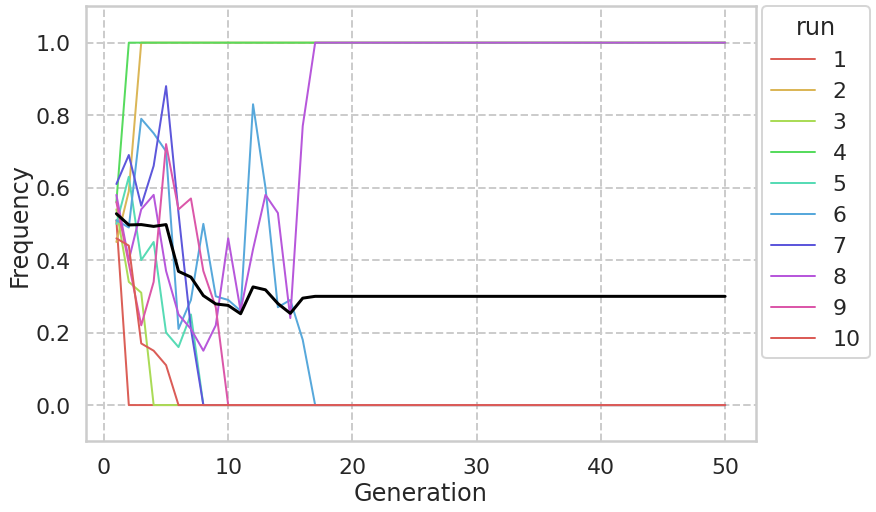

In [8]:
plot_multiple_runs(data_model=data_model)

結果は、前の章で見た同調についての結果と似ています：2つの形質のうちの1つがすぐに固定化されます。しかし、同調の場合、固定化される形質は、ランダムな初期化のプロセスのために、たまたま最初にわずかに高い頻度を持っていた形質の方でした。デモンストレータ・バイアスがあると、このようなことはありません。

この観点から見ると、間接的なデモンストレータベースのバイアスは、よりバイアスのない伝達に近いものです。第1章を覚えていれば、バイアスのない伝達を用いたシミュレーションでも、小さな母集団（N=100）では、一般的に1つの形質が固定化されますが、大きな母集団（N=10000）では、2つの形質の頻度はp=0.5程度にとどまりました。デモンストレーターベースのバイアスではどうなるでしょうか？

In [9]:
data_model_2 = biased_transmission_demonstrator(N = 10000, p_s = 0.005, p_low=0.0001, p_0 = 0.5, t_max = 200, r_max = 10)

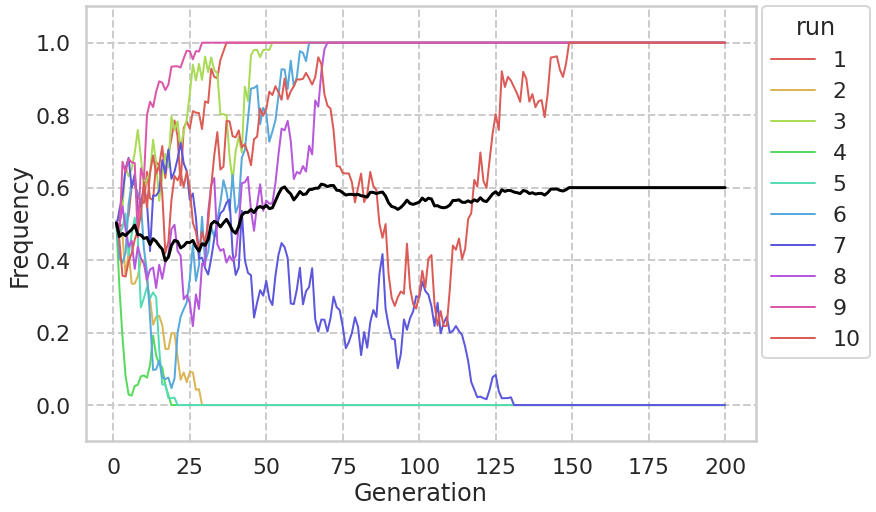

In [10]:
plot_multiple_runs(data_model=data_model_2)

N=10000の場合でも、このケースのように高ステータス個体の数が十分に少ない場合（ps=0.005は、平均して50個体が高ステータスであることを意味します）、形質は固定化に達します。デモンストレータのプールを減らす（Nを小さくする）ことで、デモンストレータベースのバイアスが全体のダイナミクスにとってドリフトをより重要なものにします。高ステータスのデモンストレーターのプール（N×psに等しい）が有効母集団サイズであり、これは実際の母集団サイズ（N）よりもはるかに小さいものです。

psとplowを異なる値に設定して実験することができます。ダイナミクスがバイアスのない伝達と区別がつかなくなる前に、高ステータスのデモンストレータのプールはどのくらいの大きさになるのでしょうか？

# **5.2　　「勝利する」形質を予測する**

同調では、先ほど述べたように、過半数の頻度初期値を与えられた形質が固定化に至るようになります。バイアスのない伝達では、固定化に至る形質はシミュレーションの最初に予測できません。デモンストレータに基づくバイアスでは、「勝つ」形質は、最初に高ステータスの個体に最も多く見られる形質であると合理的に推測できます。この直感を我々のモデルで確認することができるでしょうか？

現在のところ、シミュレーションから得られる出力はこの目的には適していません。というのも、一方では、我々が必要とする十分な重要な情報を出力しません。つまり、populationが初期化されたときの高いステータスの個体の間での各形質の割合です。他方では，各時間ステップにおける2つの形質の頻度など，必要のない情報を出力します。しかし、我々が知りたいのは、どの形質が固定化に達するのかということだけです。そのため、biased_transmission_demonstrator()関数を書き換えて、出力されるデータフレームを我々のニーズに合わせて変更することができます。

In [11]:
def biased_transmission_demonstrator_2(N, p_0, p_s, p_low, t_max, r_max):
    #アウトプット用のデータフレームを作成
    ##run列となるリスト
    status_A = np.repeat("None", repeats=r_max, axis=0)

    ##p(Aの頻度)列となるリスト
    p = np.zeros(r_max)

    output = pd.DataFrame()
    output["status_A"] = status_A # 高ステータスの個人の内、形質Aを保持している人の割合(初期値のみ)
    output["p"] = p

    # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy3次元アレーで代用
    status_A_array = np.repeat("None", repeats=r_max)
    p_array = np.zeros(r_max)

    for r in range(r_max):
        # 形質を割合p_0に従って、割り当てる
        population_trait = np.random.choice(cultural_traits, size=N, p=[p_0, 1-p_0], replace=True)
        # 地位を割合p_sに従って、割り当てる
        population_status = np.random.choice(status, size=N, p=[p_s, 1-p_s], replace=True)
        # 1世代目のpopulationを作る
        population = pd.DataFrame()
        population["trait"]=population_trait
        population["status"]=population_status

        # 全員が高ステータス個体だとして、デモンストレータの（コピーされる確率）リストを作る
        p_demonstrator = np.repeat(a=1, repeats=N)
        # 低ステータス個体のコピーされる確率をp_lowに修正
        p_demonstrator[population_status == "low"] = p_low

        # 各ラン、初めの世代のstatus_A(高ステータスの個人の内、形質Aを保持している人の割合)を埋める
        if sum(population["status"]=="high") > 0:
            status_A_array[r] = (sum((population["status"]=="high") & (population["trait"]=="A")))/sum(population["status"]=="high")

        for t in range(1, t_max):
            # 前世代のpopulation_traitリストを作る (現世代のpopulationに伝達や淘汰などで変更を加える前に)
            previous_population_trait = population_trait
                
            # ステータスに従って、形質をコピーする
            if sum(p_demonstrator)>0:
                demonstrator_index = np.random.choice(range(N), size=N, replace=True, p=p_demonstrator/sum(p_demonstrator))
                population_trait = previous_population_trait[demonstrator_index]

        # numpy2次元アレーに形質Aを持つ人数の頻度を代入(全世代が終わってからのみ)
        p_array[r] = list(population_trait).count("A") / N

    # numpy2次元アレーをpandasのデータフレームへとラン毎に代入
    output["p"] = p_array
    output["status_A"] = status_A_array

    #結果（プロットするデータ）をリターン
    return output  

ここで、status_Aは、高ステータス個体の中での形質Aの初期頻度を与えます。pは、前述のように、母集団全体でのAの頻度を与えますが、この値を記録するのは、ある形質が固定化されたかどうかを確認するために、シミュレーションの最後の最後だけです。結果として、データフレームの出力は、rmax行だけになりました。

新しい関数 `biased_transmission_demonstrator_2()`を50回実行してみましょう（`r_max = 50`を設定）。これで、より多くの独立したデータポイントを得て、出力されたものを見ることができます。

In [12]:
data_model_3 = biased_transmission_demonstrator_2(N = 100, p_s = 0.05, p_low=0.0001, p_0 = 0.5, t_max = 50, r_max = 50)
data_model_3

,status_A,p
0,0.12,0.0
1,0.0,0.0
2,0.5,1.0
3,0.66,1.0
4,0.5,1.0
5,0.5,0.0
6,0.2,0.0
7,0.42,1.0
8,0.5,1.0
9,0.5,1.0


出力の各行は、シミュレーションの1つのランです。最初の列（status_Aとラベルされたもの）は、高ステータスの個体におけるAの頻度、2番目の列（pとラベルされたもの）はシミュレーションの終了時のAの頻度を与えています。出力をざっと見ただけでも、我々の推測が正しかったことがわかるはずです。 そして、status_Aが0.5よりも高いとき、pは一般的に1で、status_Aが0.5よりも低いとき、pは一般的に0です。 しかし、確認のためにすべてのデータを可視化してみましょう。

我々は、高ステータス個体の初期の割合が、2つの可能性のある結果（形質Aが固定に達するか、形質Bが固定に達するか）とどのように関連しているかを知りたいのです。便利な方法は、ボックスプロットを使うことです。以下のコードでは、形質が固定化に達していない（存在する場合）ランを除外し、わかりやすくするために、どの形質が固定化に達したかによって、それぞれのランに形質名AまたはBを割り当てます。そして、出力をプロットすることができます。

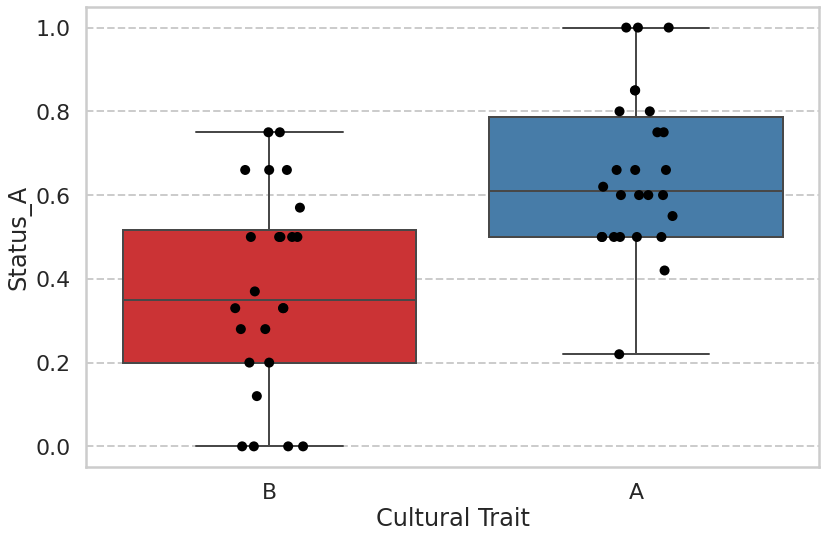

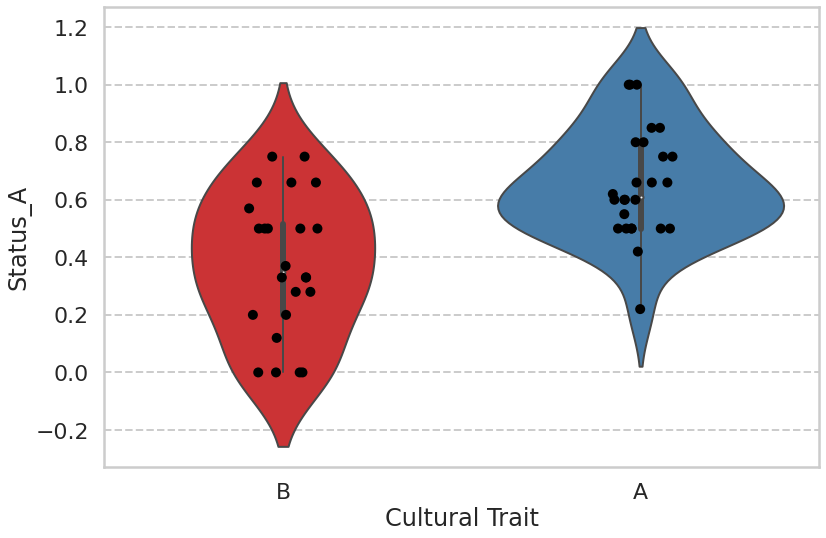

In [13]:
# pの値が0か1に固定されているランのみを抽出
data_model_3_new = data_model_3[(data_model_3["p"] == 0) | (data_model_3["p"] == 1)]


# pの値が1で固定されているランを"A"と名付け（最終的に形質Aが固定されたため）、pの値が0で固定されているランを"B"と名付ける（最終的に形質Bが固定されたため）
data_model_3_new["p"] = data_model_3_new["p"].map({1:"A",0:"B"})
# print(data_model_3_new)
data_model_3_new['status_A'] = data_model_3_new['status_A'].astype(float)

"""ラン"A"・ラン"B"と高ステータスの個体が形質Aを持つ初期頻度status_Aの関係性を、箱ひげ図をプロットすることで探る"""
 # 体裁いじいじ
sns.set_palette("hls",n_colors=24)
sns.set('poster', 'whitegrid', 'dark', font_scale=1,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x="p", y="status_A", data=data_model_3_new, palette="Set1")
sns.stripplot(x='p', y="status_A", data=data_model_3_new, size=10,
                dodge=True, jitter=True, color='black')

plt.xlabel("Cultural Trait")
plt.ylabel("Status_A")
plt.tight_layout()
plt.show()

"""バイオリンプロット"""
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x="p", y="status_A", data=data_model_3_new, palette="Set1")
sns.stripplot(x='p', y="status_A", data=data_model_3_new, size=10,
                dodge=True, jitter=True, color='black')
plt.xlabel("Cultural Trait")
plt.ylabel("Status_A")
plt.tight_layout()
plt.show()

このプロットは、最初に形質Aを持つハイステータスな個体が多いとき、形質Aが固定化に達し、Bについてはその逆であることを示しており、我々の直感を裏付けています。しかし、これは安全な賭けではありません。Aを持つハイ・ステータス個体が4分の1しかいなかった場合に，母集団のすべてがAを持つことになり，逆に，Aを持つハイ・ステータス個体が80%いてもBが固定化されるランがある．より大きな母集団（例えば、N = 10000）では、より予測は難しくなる。

In [14]:
data_model_4 = biased_transmission_demonstrator_2(N = 10000, p_s = 0.005, p_low=0.0001,p_0 = 0.5, t_max = 200, r_max = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


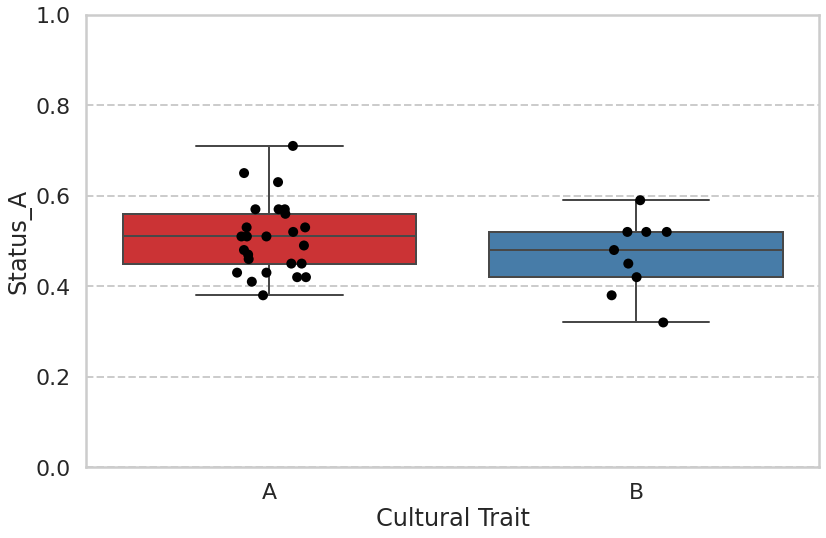

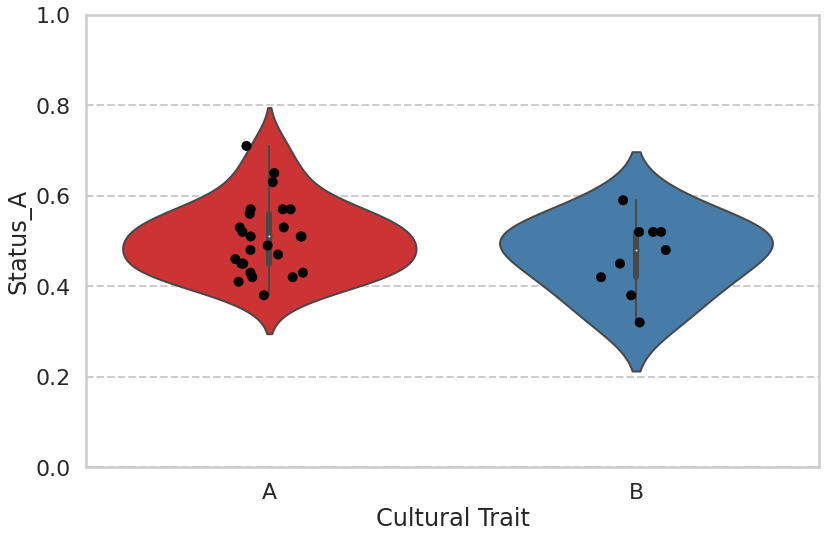

In [15]:
# pの値が0か1に固定されているランのみを抽出
data_model_4_new = data_model_4[(data_model_3["p"] == 0) | (data_model_4["p"] == 1)]


# pの値が1で固定されているランを"A"と名付け（最終的に形質Aが固定されたため）、pの値が0で固定されているランを"B"と名付ける（最終的に形質Bが固定されたため）
data_model_4_new["p"] = data_model_4_new["p"].map({1:"A",0:"B"})
# print(data_model_3_new)
data_model_4_new['status_A'] = data_model_4_new['status_A'].astype(float)

"""ラン"A"・ラン"B"と高ステータスの個体が形質Aを持つ初期頻度status_Aの関係性を、箱ひげ図をプロットすることで探る"""
 # 体裁いじいじ
sns.set_palette("hls",n_colors=24)
sns.set('poster', 'whitegrid', 'dark', font_scale=1,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x="p", y="status_A", data=data_model_4_new, palette="Set1")
sns.stripplot(x='p', y="status_A", data=data_model_4_new, size=10,
                dodge=True, jitter=True, color='black')

plt.xlabel("Cultural Trait")
plt.ylabel("Status_A")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

"""バイオリンプロット"""
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x="p", y="status_A", data=data_model_4_new, palette="Set1")
sns.stripplot(x='p', y="status_A", data=data_model_4_new, size=10,
                dodge=True, jitter=True, color='black')
plt.xlabel("Cultural Trait")
plt.ylabel("Status_A")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

N=10000人の中に50人前後の高ステイタスの人がいると、最初に「影響力のある」デモンストレータに、形質はより均等に分布しており、2つの結果にはほとんど差がありませんでした。

# **5.3　　モデルのまとめ**

この章では、間接バイアス、またはデモンストレータ・バイアスの伝達の例をモデル化しました。populationの中の一部の個体が「高ステータス」であり、それゆえにデモンストレータとして選択される可能性が高いと仮定しました。その結果、このような状況では、populationが多くても形質が優勢になる可能性が高いことがわかりました。これは、デモンストレータのバイアスが効果的にデモンストレータのプールを減少させ、ドリフト／バイアスのない伝達と同様のプロセスを経て収束を加速させることによるものです。

また、どの形質が優勢になるかを予測できるかどうかは、ステイタスの高いデモンストレータの数に依存することがわかりました。高ステータスのデモンストレータの数が少ない場合、これらの高ステータスのデモンストレータの中で最も一般的な形質は固定化される可能性が高いです。彼らの数が増えると、そのような予測をすることは難しくなります。

また、興味のある問題に応じてモデルの出力データを変更することが重要であることもわかりました。我々は、異なるグループ間のデータの分布を表示する便利な方法であるボックスプロットを作成しました。

# **5.4　　さらに学びたい人のために**

デモンストレータベースの間接的バイアスの伝達を実装したシミュレーションモデルの例としては、個人ベースのモデルであるMesoudi（2009）があり、プレスティージ・バイアスがどのようにして繰り返される行動のクラスターを生み出すかを探り、模倣自殺のケースに適用している。Henrich Joseph, Chudek Maciej, and Boyd Robert (2015)は、プレスティージがグループ内協力の出現に結びつくpopulationレベルのモデルを提示している。Henrich（2004）は、個人が母集団の中で最も成功したデモンストレータをコピーするという分析的な母集団レベルのモデルを記述している。

デモンストレータに基づくバイアスに関するそれ以前の分析は、Boyd and Richerson (1985)の第8章にあり、デモンストレータに関連する可能性のある象徴的な形質の進化についても拡張されています。

最後に、Henrich and Gil-White (2001)はプレスティージ・バイアスの古典的な研究であり、それを支持する経験的証拠の最近のレビューはJiménez and Mesoudi (2019)である。